![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#natural language processing
#pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vlad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 3 - Analysis I: NLP with outlier removal
    a) Importing data
    
    b) Success-percentage column
        - check for outliers
        
    c) Checking for other outliers
        - goals
        - converted_pledged_cmount
        - backers_count
        
    d) Natural Language Processing
        - cleaning blurb variable
            - punctuation
            - stopwords
            - lemmatization
        - writing and saving corpus

### a) Importing data
##### Use 'cleaned_data.csv' to begin cleaning

In [2]:
#import .csv file
cleaned_df = pd.read_csv("cleaned_data.csv")

cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned_df.shape)
cleaned_df.head(1)

(149563, 21)


,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,launched_at,deadline,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state
0,498799566,"Strange Wit, an original graphic novel about J...",Graphic Novels,comics,"{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",https://www.kickstarter.com/discover/categorie...,"The true biography of the historical figure, w...",strange-wit-an-original-graphic-novel-about-ja...,12000,14740,...,2015-08-15 04:19:27,2015-09-14 04:19:27,US,USD,403,0,0,1,1,successful


##### Counts for 'state' column

In [3]:
print(cleaned_df['state'].value_counts())
print('\n')
print('In our data, we have a good proportion of failed:successful campaigns \n so the steps below will explore these numbers in more detail in an attempt to filter our data.')

successful    93849
failed        55714
Name: state, dtype: int64


In our data, we have a good proportion of failed:successful campaigns 
 so the steps below will explore these numbers in more detail in an attempt to filter our data.


### b) Success-Percentage Column
Make a new column for success % (goal amount / pledged amount)

In [4]:
#create column
cleaned_df['success_percentage']=(cleaned_df['converted_pledged_amount'] / cleaned_df['goal']) * 100

In [6]:
#finding the missing and infinite values
print('null:', cleaned_df['success_percentage'].isnull().sum())
print('na:', cleaned_df['success_percentage'].isna().sum())
print('\n')
print('inf:', np.isinf(cleaned_df["success_percentage"]).value_counts())

null: 0
na: 0


inf: False    149562
True          1
Name: success_percentage, dtype: int64


In [7]:
#locate the row in which the inf value is present (last column == 'inf')
print(cleaned_df.index[np.isinf(cleaned_df['success_percentage'])])
print('\n')
print('Row 118304 "success_percentage" value:', cleaned_df['success_percentage'].iloc[118304])

Int64Index([118304], dtype='int64')


Row 118304 "success_percentage" value: inf


In [296]:
#drop the row with inf value
cleaned_df.drop(cleaned_df.index[118304], inplace=True)

#reset index
cleaned_df.reset_index(drop=True,inplace=True)

## total number of rows and columns
print('dataframe shape: ', cleaned_df.shape)

dataframe shape:  (149562, 22)


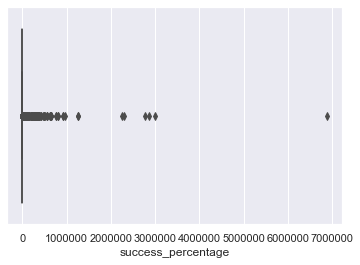

In [297]:
#make a boxplot of 'success_percentage' column
sns.boxplot(x=cleaned_df['success_percentage'])

In [298]:
#check range of 'success_percentage' column

bins = [0, 1, 5, 10, 25, 50, 75, 100, 125, 150, 200, 300, 500, 1000, 2500, 5000, 7500, 10000, 100000, 1000000, np.inf]
success_bins = pd.cut(cleaned_df['success_percentage'], bins=bins).value_counts().sort_index()
print (success_bins)

(0.0, 1.0]               17368
(1.0, 5.0]                9581
(5.0, 10.0]               4893
(10.0, 25.0]              6966
(25.0, 50.0]              4360
(50.0, 75.0]              1456
(75.0, 100.0]             5570
(100.0, 125.0]           48737
(125.0, 150.0]           11371
(150.0, 200.0]            9165
(200.0, 300.0]            7086
(300.0, 500.0]            5039
(500.0, 1000.0]           3609
(1000.0, 2500.0]          2282
(2500.0, 5000.0]           635
(5000.0, 7500.0]           214
(7500.0, 10000.0]           79
(10000.0, 100000.0]        196
(100000.0, 1000000.0]       81
(1000000.0, inf]             8
Name: success_percentage, dtype: int64


In [299]:
#check left-outliers
print(cleaned_df[cleaned_df['success_percentage'].between(0, 60)]['state'].value_counts())
print('\n')
print('On the other hand, these campaigns were started with very high goals in mind and this is why they have such a \nlow success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(0, 60)]['goal'].value_counts())

failed        54811
successful        3
Name: state, dtype: int64


On the other hand, these campaigns were started with very high goals in mind and this is why they have such a 
low success percentage.


5000     4761
10000    4206
1000     2349
15000    2218
20000    2082
         ... 
5521        1
15764       1
1523        1
1555        1
64          1
Name: goal, Length: 2415, dtype: int64


In [300]:
#check outliers on the right extreme
print(cleaned_df[cleaned_df['success_percentage'].between(105, np.inf)]['state'].value_counts())
print('\n')
print('It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a \nhigh success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(105, np.inf)]['goal'].value_counts())

successful    68635
failed            1
Name: state, dtype: int64


It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a 
high success percentage.


5000     4761
10000    4124
1000     3764
500      3346
2000     3029
         ... 
39500       1
2654        1
23667       1
10970       1
64          1
Name: goal, Length: 1986, dtype: int64


In [301]:
#check range of data between 33% and 100% success_percentage 
print(cleaned_df[cleaned_df['success_percentage'].between(32.9, 100.1)]['state'].value_counts())
print('\n')
print('comment here')

successful    6114
failed        4066
Name: state, dtype: int64


comment here


In [302]:
#remove left outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(0, 32.9)].index, inplace=True)
cleaned_df.shape

(97910, 22)

In [303]:
#remove right outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(100.1, np.inf)].index, inplace=True)
cleaned_df.shape

(10062, 22)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A730B31608>]],
      dtype=object)

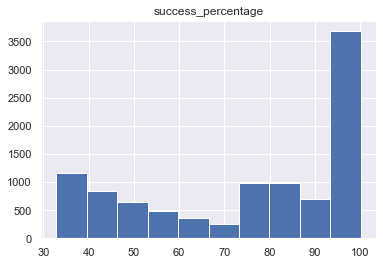

In [304]:
cleaned_df.hist(column='success_percentage')

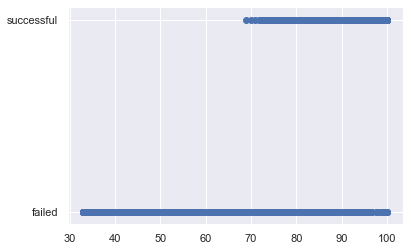

In [305]:
y = cleaned_df['state']
x = cleaned_df['success_percentage']

plt.scatter(x, y)
plt.show()

Our boxplot is starting to look more like a box now.


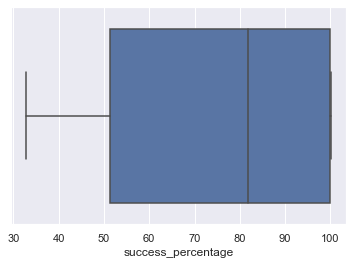

In [306]:
sns.boxplot(x=cleaned_df['success_percentage'])
print('Our boxplot is starting to look more like a box now.')

In [307]:
print(cleaned_df['state'].value_counts())

successful    5998
failed        4064
Name: state, dtype: int64


### c) Checking for other outliers

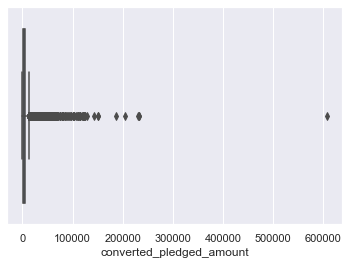

In [310]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

In [311]:
#check range of 'converted_pledged_amount' column
bins = [0, 1, 5, 10, 50, 100, 2500, 5000, 10000, 25000, 35000, 50000, 75000, 100000, 125000, 500000, 1000000, 10000000, 15000000, np.inf]
pledged_bins = pd.cut(cleaned_df['converted_pledged_amount'], bins=bins).value_counts().sort_index()
print (pledged_bins)

(0.0, 1.0]                    34
(1.0, 5.0]                    11
(5.0, 10.0]                   25
(10.0, 50.0]                 143
(50.0, 100.0]                198
(100.0, 2500.0]             4744
(2500.0, 5000.0]            1939
(5000.0, 10000.0]           1492
(10000.0, 25000.0]          1066
(25000.0, 35000.0]           173
(35000.0, 50000.0]           110
(50000.0, 75000.0]            71
(75000.0, 100000.0]           24
(100000.0, 125000.0]          20
(125000.0, 500000.0]          11
(500000.0, 1000000.0]          1
(1000000.0, 10000000.0]        0
(10000000.0, 15000000.0]       0
(15000000.0, inf]              0
Name: converted_pledged_amount, dtype: int64


In [312]:
#check what the 'converted pledged amount' values below 10 reveal
print(cleaned_df[cleaned_df['converted_pledged_amount']<10]['state'].value_counts())
print('\n')
print('What we find is that most of these left-outliers are somewhat distributed between success/fail.')

successful    40
failed        10
Name: state, dtype: int64


What we find is that most of these left-outliers are somewhat distributed between success/fail.


In [313]:
#check what the 'converted pledged amount' values anove 50,000 reveal
print(cleaned_df[cleaned_df['converted_pledged_amount']>50000]['state'].value_counts())
print('\n')
print('What also find that most of these right-outliers are evenly distributed between success/fail.')

failed        68
successful    59
Name: state, dtype: int64


What also find that most of these right-outliers are evenly distributed between success/fail.


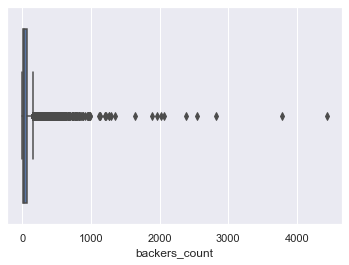

In [314]:
sns.boxplot(x=cleaned_df['backers_count'])

In [315]:
#check range of 'backers_count' column
bins = [0, 1, 10, 25, 50, 75, 100, 250, 300, 500, 1000, 3000, 5000, 10000, 50000, 110000, np.inf]
backers_bins = pd.cut(cleaned_df['backers_count'], bins=bins).value_counts().sort_index()
print (backers_bins)

(0.0, 1.0]              168
(1.0, 10.0]            1747
(10.0, 25.0]           2568
(25.0, 50.0]           2199
(50.0, 75.0]           1160
(75.0, 100.0]           689
(100.0, 250.0]         1152
(250.0, 300.0]          100
(300.0, 500.0]          167
(500.0, 1000.0]          92
(1000.0, 3000.0]         18
(3000.0, 5000.0]          2
(5000.0, 10000.0]         0
(10000.0, 50000.0]        0
(50000.0, 110000.0]       0
(110000.0, inf]           0
Name: backers_count, dtype: int64


In [316]:
#check what the 'backers_count' values above 250 reveal
print(cleaned_df[cleaned_df['backers_count']>250]['state'].value_counts())
print('\n')
print('Since this row shows the number of backers for each campaign, it makes sense that the higher the number \nthe more successful the campaign is. These outliers are somewhat distributed. \n***Therefore no outlier removal for this variable.')

successful    223
failed        156
Name: state, dtype: int64


Since this row shows the number of backers for each campaign, it makes sense that the higher the number 
the more successful the campaign is. These outliers are somewhat distributed. 
***Therefore no outlier removal for this variable.


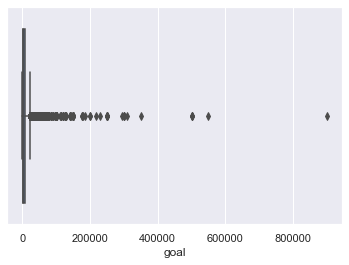

In [317]:
sns.boxplot(x=cleaned_df['goal'])

In [318]:
#check range of 'goal' column
bins = [0, 1.5, 2, 5, 10, 50, 100, 2500, 5000, 10000, 15000, 20000, 25000, 35000, 50000, 75000, 85000, 100000, 500000, 1000000, 10000000, 100000000, np.inf]
goal_bins = pd.cut(cleaned_df['goal'], bins=bins).value_counts().sort_index()
print (goal_bins)

(0.0, 1.5]                     34
(1.5, 2.0]                      1
(2.0, 5.0]                      5
(5.0, 10.0]                    17
(10.0, 50.0]                  118
(50.0, 100.0]                 157
(100.0, 2500.0]              4085
(2500.0, 5000.0]             2063
(5000.0, 10000.0]            1657
(10000.0, 15000.0]            636
(15000.0, 20000.0]            345
(20000.0, 25000.0]            243
(25000.0, 35000.0]            270
(35000.0, 50000.0]            215
(50000.0, 75000.0]             99
(75000.0, 85000.0]             11
(85000.0, 100000.0]            52
(100000.0, 500000.0]           52
(500000.0, 1000000.0]           2
(1000000.0, 10000000.0]         0
(10000000.0, 100000000.0]       0
(100000000.0, inf]              0
Name: goal, dtype: int64


In [319]:
#check what the 'goal' values above 10,000 reveal- are the campaigns mostly failures?
print(cleaned_df[cleaned_df['goal']>10000]['state'].value_counts())
print('\n')
print('Clearly these are outliers and by looking at the rows and their [state] we cannot justify their removal from our data \nmost of these campaigns are evenly distributed between successful/failed and must be kept to maintain our model accuracy.')


failed        1102
successful     823
Name: state, dtype: int64


Clearly these are outliers and by looking at the rows and their [state] we cannot justify their removal from our data 
most of these campaigns are evenly distributed between successful/failed and must be kept to maintain our model accuracy.


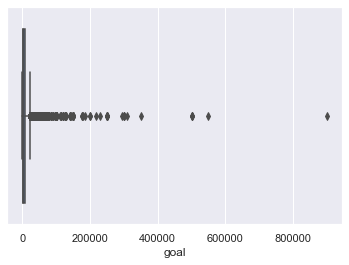

In [320]:
sns.boxplot(x=cleaned_df['goal'])

In [321]:
#reset index
cleaned_df.reset_index(drop=True,inplace=True)

### f) Natural Language Processing

##### Clean the first row to check

In [322]:
#create 'text' variable of every blurb description
text = pd.DataFrame(cleaned_df['blurb'])

#lets clean the first blurb as a first step
text['blurb'][0]

'The Treehouse at Cornell takes architecture to new heights with a teaching space in the trees for Cornell Outdoor Education'

In [323]:
#only keep letters and replace other symbols with a white space in the first blurb
blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][0])

#change letters to lower-case
blurb = blurb.lower()   

#split the first blurb which is a string into list
blurb = blurb.split()

#for loop to remove stop-words and to do lemmatization
wn = WordNetLemmatizer()
blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]

#join blurb back into a string from a list
blurb = ' '.join(blurb)

blurb

'treehouse cornell take architecture new height teaching space tree cornell outdoor education'

### Clean the entire 'blurb' column

In [324]:
length = len(pd.DataFrame(cleaned_df['blurb']))

In [325]:
corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    corpus.append(blurb)

In [326]:
#write corpus array into a dataframe and save it to a csv for importing into the Step 4 (Classification)
corpus_df = pd.DataFrame(corpus, columns = ['blurb'])
corpus_df.head()

,blurb
0,treehouse cornell take architecture new height...
1,track collection new original musical piece jo...
2,juxtaposing delicious food good friend unsettl...
3,melody mus tell story melody struggle encounte...
4,mission help build passion science teaching ne...


### End of Step 3

In [327]:
#write corpus_df to a .csv
corpus_df.to_csv('corpus_data.csv')

In [328]:
#write cleaned cleaned_df to a .csv
cleaned_df.to_csv('cleaned2_data.csv')